# Applied Statistics - Project

### By Joanne Feeney
***

Project created with the help of Github Co-Pilot

Imports that will be used for this project.

In [15]:
# Imports
import math
import pandas as pd
import itertools
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

## Task 1:

Downloading and saving the dataset to my repository.

Reading in PlantGrowth R dataset.

In [16]:
# Load csv file
data=pd.read_csv("datasets\PlantGrowth.csv")

# Show
data.head()

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Joanne Feeney\AppData\Local\Temp\ipykernel_5324\1163731148.py:2: SyntaxWarning: invalid escape sequence '\P'
  data=pd.read_csv("datasets\PlantGrowth.csv")


,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


"Dobson, A. J. (1983) An Introduction to Statistical Modelling. London: Chapman and Hall."

https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html

## Task 2:

Describe the data set in your notebook.

The dataset contains results from an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions. It contains two main variables, a treatment group and the weight of plants within those groups.

Describing the dataset

In [17]:
# Describe
data.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


The dataset has 30 cases & 2 variables

The groups variables are ‘ctrl’, ‘trt1’, and ‘trt2’

## Task 3:

Describe what a t-test is, how it works, and what the assumptions are.

**What Is a T-Test?**

A t-test is an inferential statistic used to determine if there is a significant difference between the means of two groups and how they are related. T-tests are used when the data sets follow a normal distribution and have unknown variances.

The t-test is a test used for hypothesis testing in statistics and uses the t-statistic, the t-distribution values and the degrees of freedom to determine statistical significance.

**How it works**

A t-test compares the average values of two data sets and determines if they came from the same population. For example, the grades of students from a physics class and those of a different group of students from a writing class would not likely have the same mean and standard deviation.


**Assumptions**

Four assumptions are made while using a t-test:

- The data collected must follow a continuous or ordinal scale.
- The data is collected from a randomly selected portion of the total population
- The data will result in a normal distribution of a bell-shaped curve.

[1]

## Task 4:

Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

Testing whether it follows normal distribution

https://www.geeksforgeeks.org/how-to-conduct-a-two-sample-t-test-in-python/

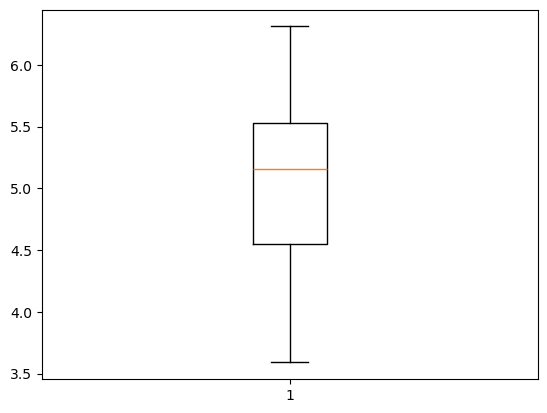

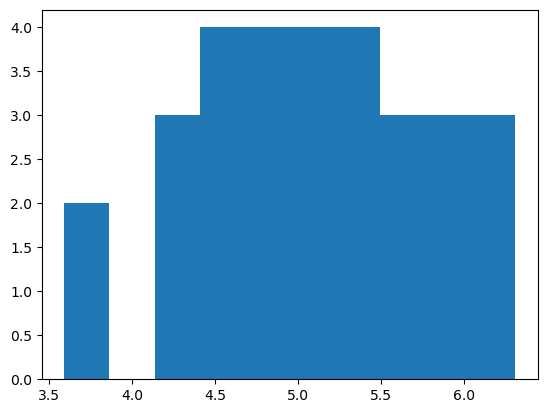

In [18]:
# Normality test
stats.shapiro(data["weight"])

# Boxplot
plt.boxplot(data["weight"])
plt.show()

# Histogram
plt.hist(data["weight"])
plt.show()

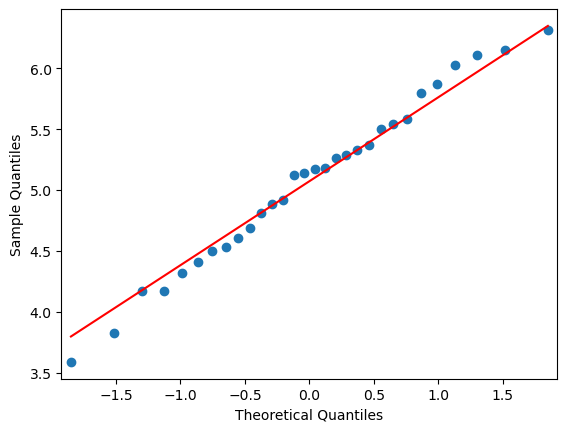

In [19]:
# QQ plot
sm.qqplot(data["weight"], line='s')
plt.show()

https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html

t-tests on this dataset 

In [20]:
# Group the data
grouped_data=data.groupby("group")
grouped_data.describe()

rownames                                                weight         \
         count  mean      std   min    25%   50%    75%   max  count   mean   
group                                                                         
ctrl      10.0   5.5  3.02765   1.0   3.25   5.5   7.75  10.0   10.0  5.032   
trt1      10.0  15.5  3.02765  11.0  13.25  15.5  17.75  20.0   10.0  4.661   
trt2      10.0  25.5  3.02765  21.0  23.25  25.5  27.75  30.0   10.0  5.526   

                                                    
            std   min     25%    50%     75%   max  
group                                               
ctrl   0.583091  4.17  4.5500  5.155  5.2925  6.11  
trt1   0.793676  3.59  4.2075  4.550  4.8700  6.03  
trt2   0.442573  4.92  5.2675  5.435  5.7350  6.31

In [21]:
# Get the groups
group1=data[data.group=="ctrl"]
group2=data[data.group=="trt1"]
group3=data[data.group=="trt2"]

In [22]:
# Perform t-test
stats.ttest_ind(group2.weight,group3.weight)

TtestResult(statistic=-3.0100985421243616, pvalue=0.0075184261182198574, df=18.0)

Results 

## Task 5:

Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

ANOVA on this dataset 

Boxplot

## Task 6:

Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

## Bibliography

[1] Adam Hayes, October 2024, Investopdia.com, (https://www.investopedia.com/terms/t/t-test.asp), last accessed 08/12/2024